# TEG calculator module test

In [1]:
from teg_calculator import TegPowerCalculator
import numpy as np

## Example 1: single point power calculations.

In [2]:
# Parameters of the thermoelectric module:
#
# alpha - Zeebeck coefficient
# r_tem - electrical resistance
# T     - average temperature in K
# R_tem - thermal resistance of the module

params_tem = {'alpha' : 0.0004*36, 
              'r_tem' : 2*1.7, 
              'T'     : 298.15, 
              'R_tem' : 83.6/2}

ambient_temp_difference = 20      # K
external_thermal_resistance = 70  # K/(W)

In [3]:
teg = TegPowerCalculator(alpha=params_tem['alpha'],
                         el_res=params_tem['r_tem'],
                         therm_res=params_tem['R_tem'],
                         T_aver=params_tem['T'],
                         dT=ambient_temp_difference,
                         therm_res_ext=70)

In [4]:
print("Output power of the TEG: ", "{:.2F}".format(teg.calc_power_mw()[0]), " mW")
print("Ambient temp. gradient: ", "{:.2F}".format(teg.dT), " K")
print("Temp. gradient acroos the module: ", "{:.2F}".format(teg.dT_tem), " K\n")

Output power of the TEG:  0.22  mW
Ambient temp. gradient:  20.00  K
Temp. gradient acroos the module:  5.99  K



## Example 2: body heat energy harvesting simulation.

This example simulates the output power for different __ambient temperature dT__ (ranges __from 0 to 20 K__) and __number of thermocouples N__ (ranges __from 1 to 80__ ). It assumes external thermal resistance __R_ext__ to be about __70 K/W__ and average temperature of __0 C__ .

In [5]:
number_of_thermocouples = np.linspace(1, 80, 81)
dT_array = np.linspace(0, 20, 101)

In [6]:
# Parameters of an thermocouple
params_thermocuple = {'alpha' : 0.0004 * 36/36, 
                      'r' : 2*1.7/36, 
                      'T'     : 298.15, 
                      'R' : 83.6/2 * 36}

### Calculate the output power

In [7]:
results = np.zeros((dT_array.shape[0], number_of_thermocouples.shape[0]))

for i in range(dT_array.shape[0]):
    for j in range(number_of_thermocouples.shape[0]):
        
        teg.alpha = number_of_thermocouples[j] * params_thermocuple['alpha']
        teg.therm_res = params_thermocuple['R'] / number_of_thermocouples[j] 
        teg.el_res = number_of_thermocouples[j] * params_thermocuple['r']
        teg.dT = dT_array[i]
        
        results[i][j] = teg.calc_power_mw()

 ### Visualize the results (plotiing with Latex)

In [8]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

# Latex pronting
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# Font
matplotlib.rcParams["font.family"] = "Times New Roman"

presentation = False
ieee = False

if presentation:
    # for presentation
    matplotlib.rcParams["font.size"] = 18
elif ieee:
    # for IEEE article
    matplotlib.rcParams["font.size"] = 8
else:
    # for thesis
    matplotlib.rcParams["font.size"] = 12


C:\Users\Sergey\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


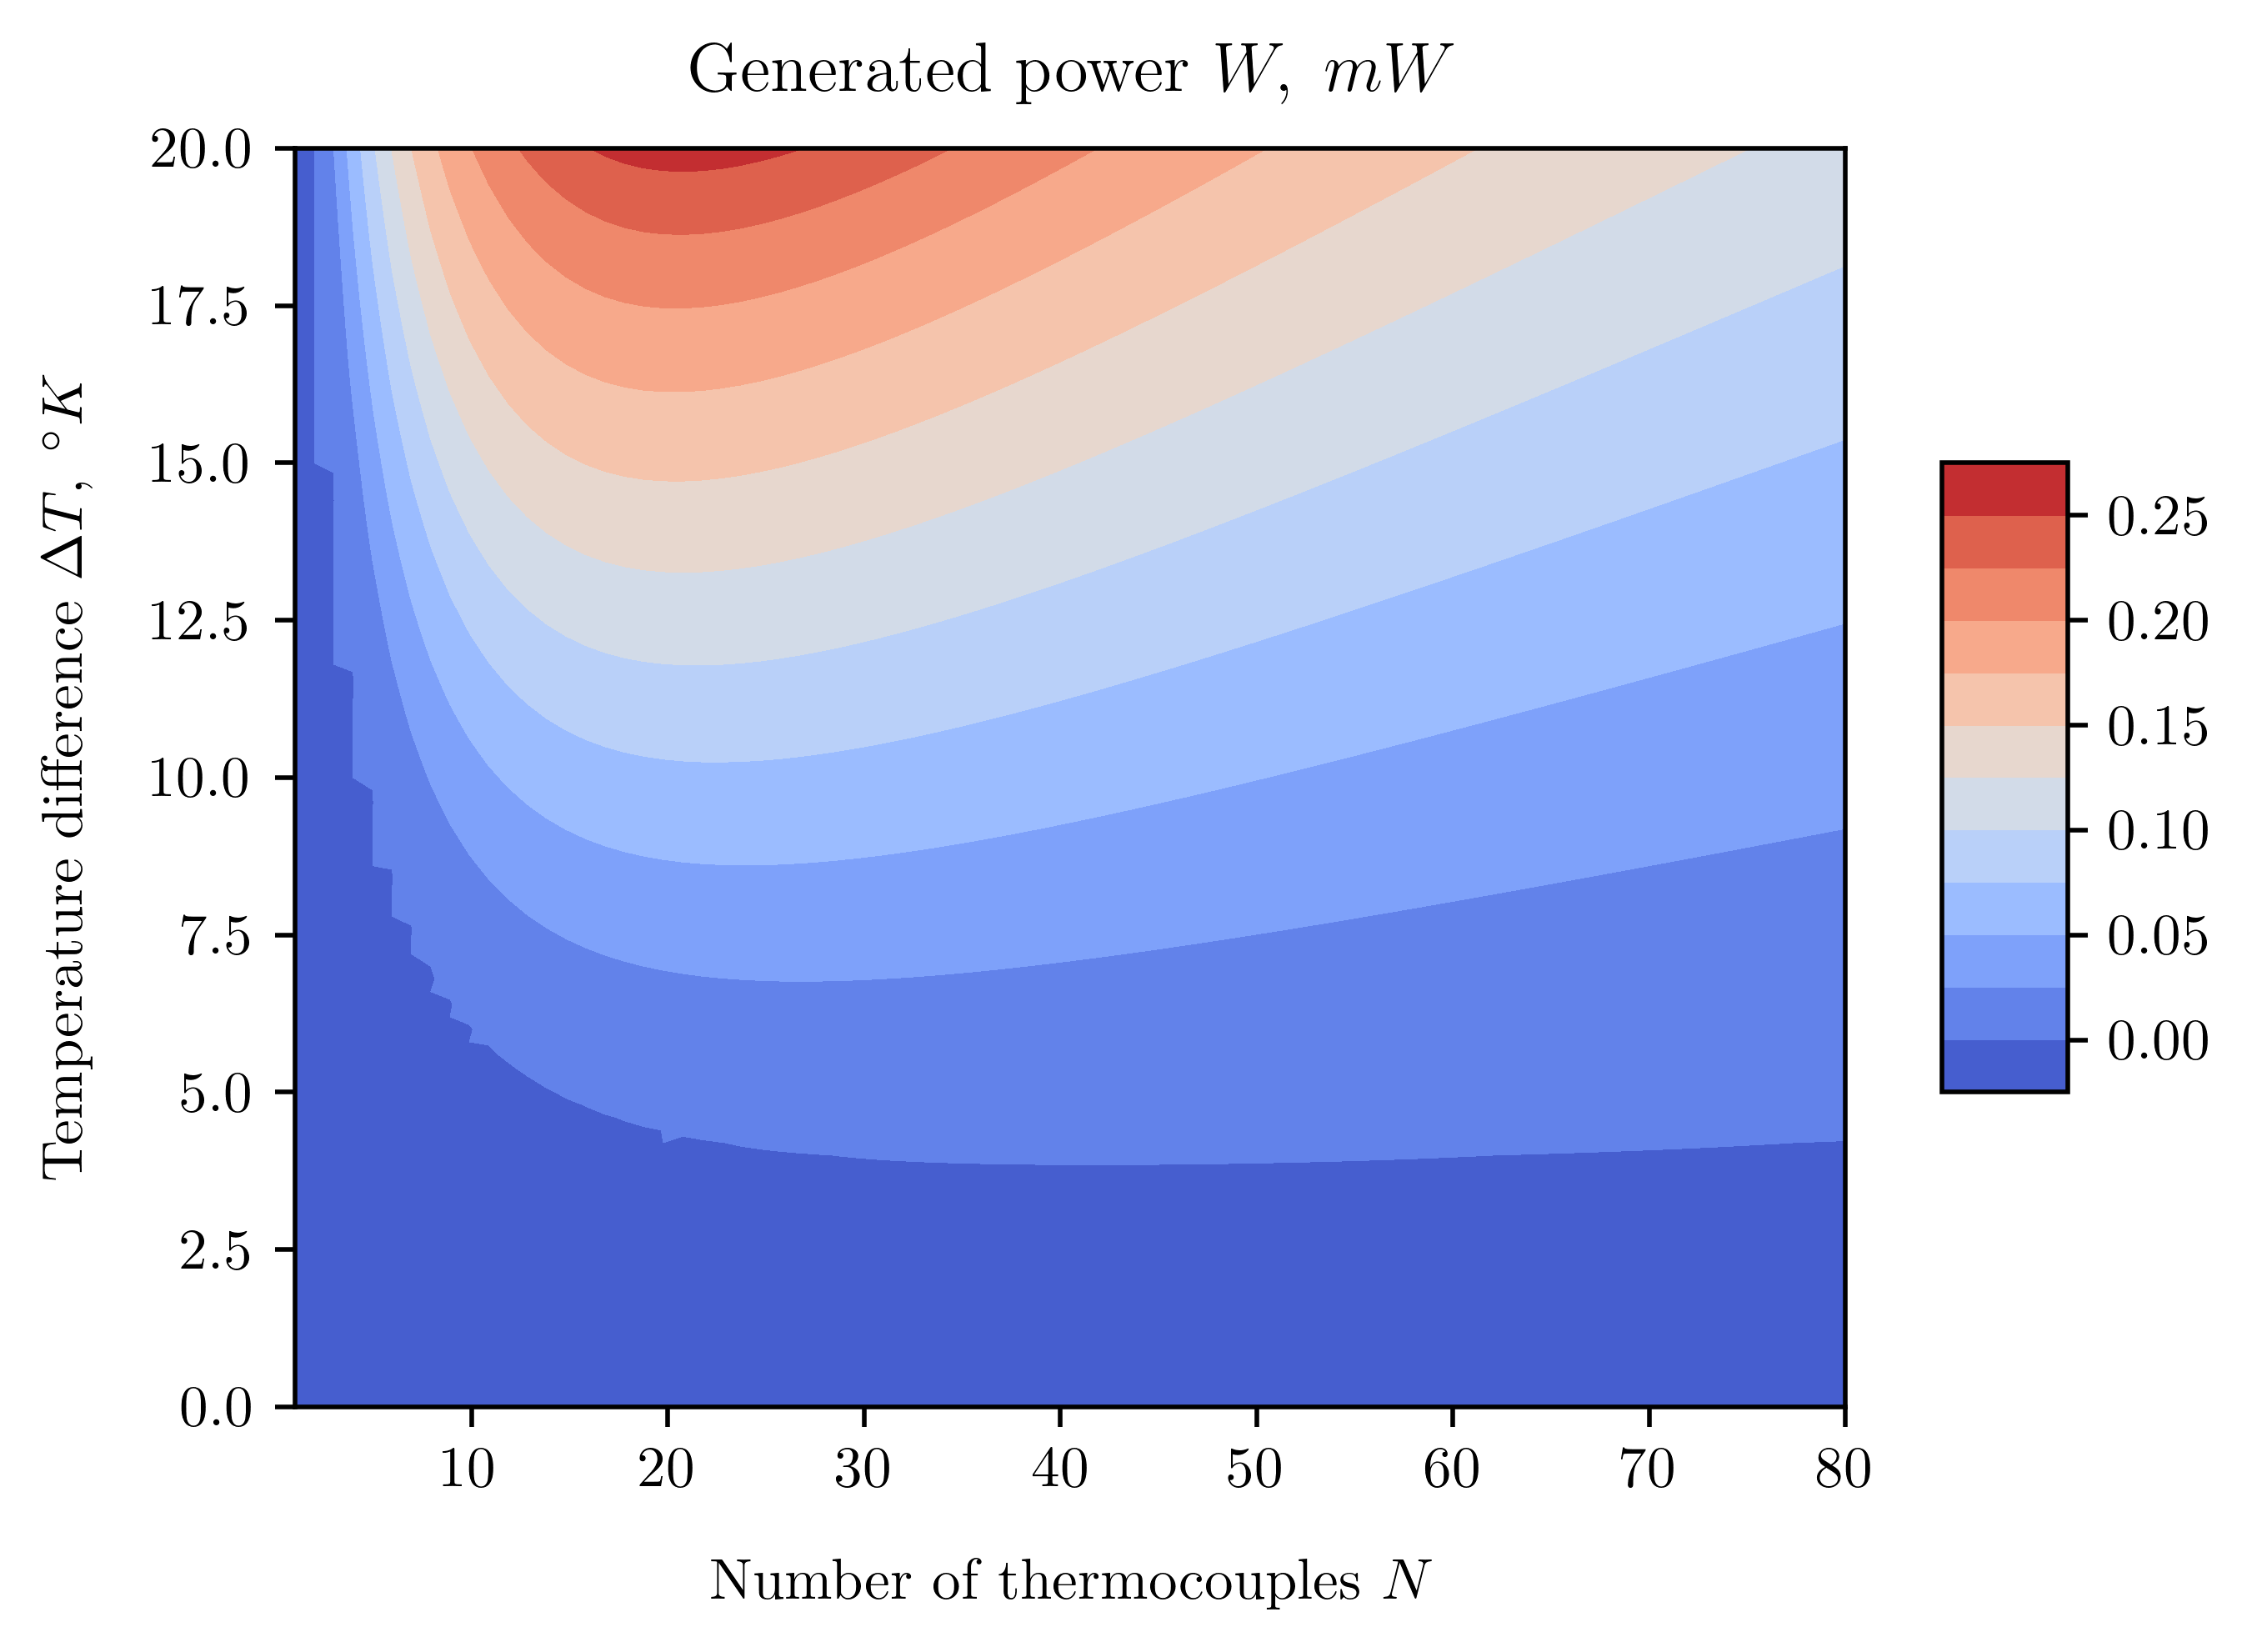

In [9]:
# Generate a mesh
number_of_thermocouples_mesh, dT_array_mesh = np.meshgrid(number_of_thermocouples, dT_array)

# Plot
fig = plt.figure(figsize=(6,4), dpi = 500)
number_of_contours = 10
contour_plot = plt.contourf(number_of_thermocouples_mesh, dT_array_mesh, results, number_of_contours, cmap=cm.coolwarm)
plt.title('Generated power '+'$W,\;mW$', pad = 10)
plt.xlabel('Number of thermocouples '+'$N$', labelpad = 10)
plt.ylabel("Temperature difference " + '$\Delta T,\;^{\circ}K$', rotation = 90, labelpad = 10)
#Add a color bar which maps values to colors.
fig.colorbar(contour_plot, shrink=0.5, aspect=5)
plt.show()

In [10]:
# Save the figure
fig.savefig( "simulation_body_heat_eh" +'.eps', format = 'eps', bbox_inches='tight')

### Visualize the results (plotiing without Latex)

In [11]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

# Font
matplotlib.rcParams["font.family"] = "Times New Roman"

presentation = False
ieee = False

if presentation:
    # for presentation
    matplotlib.rcParams["font.size"] = 18
elif ieee:
    # for IEEE article
    matplotlib.rcParams["font.size"] = 8
else:
    # for thesis
    matplotlib.rcParams["font.size"] = 12


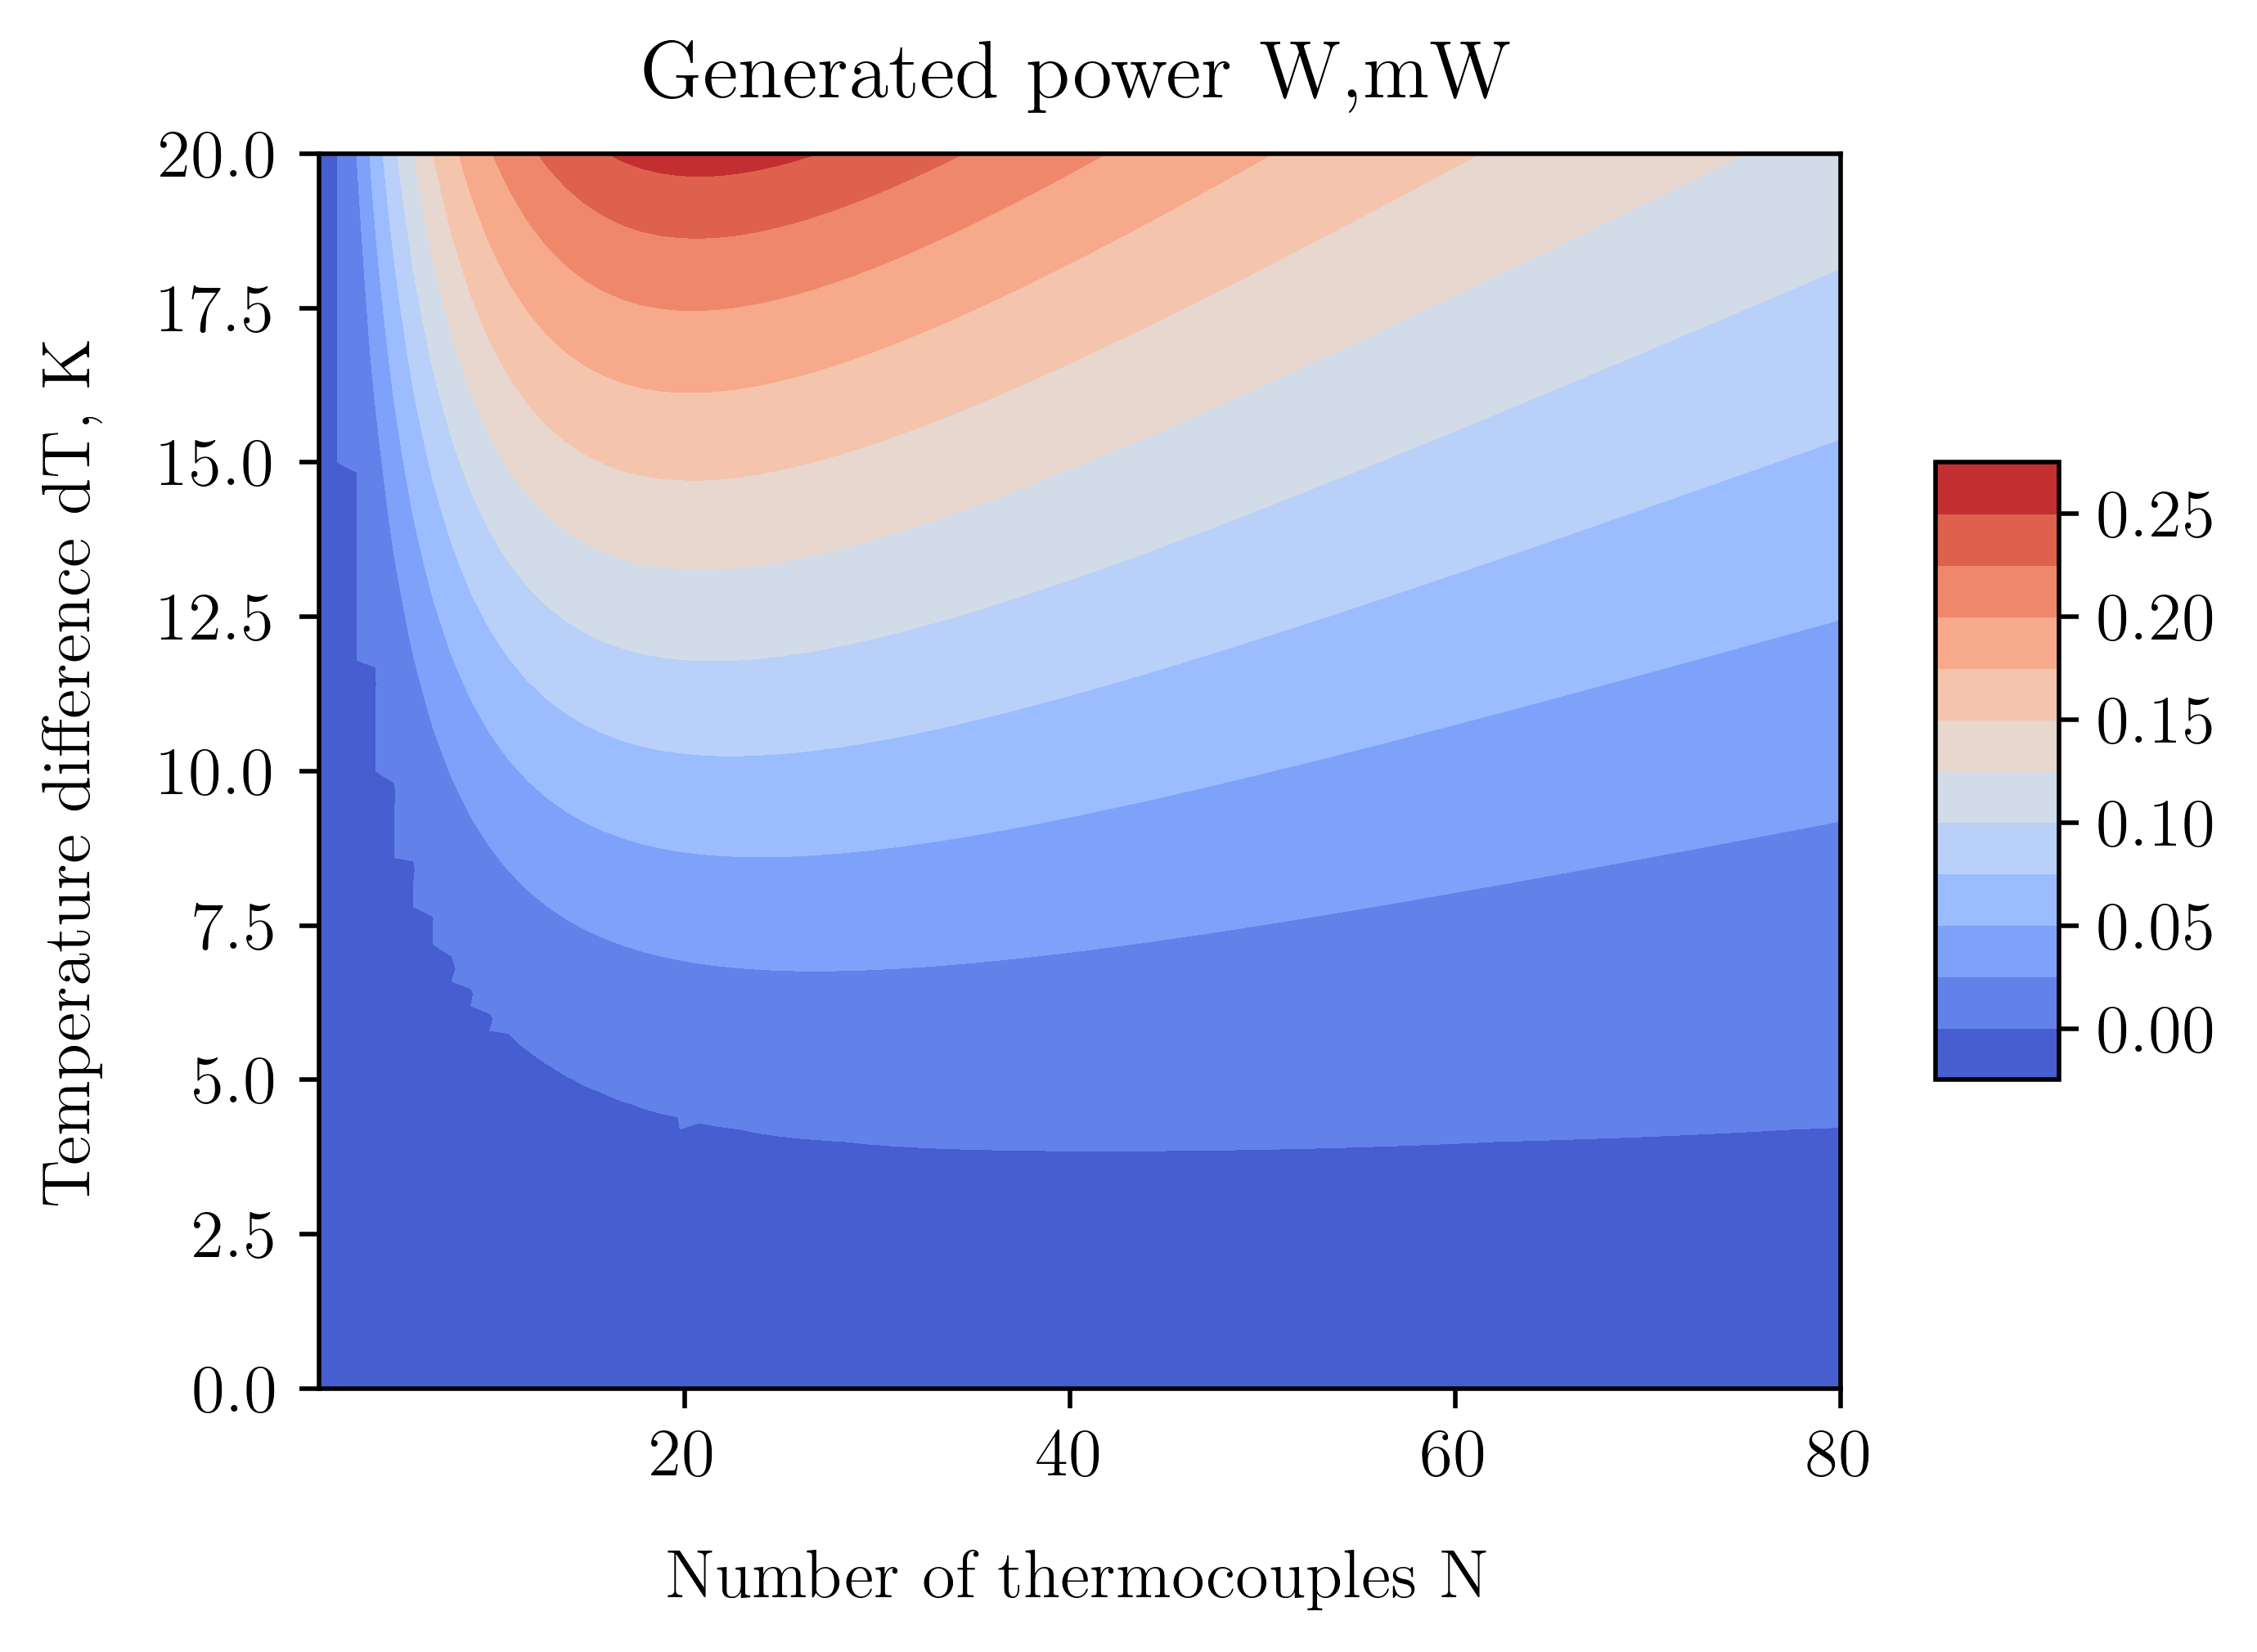

In [12]:
# Generate a mesh
number_of_thermocouples_mesh, dT_array_mesh = np.meshgrid(number_of_thermocouples, dT_array)

# Plot
fig = plt.figure(figsize=(6,4), dpi = 500)
number_of_contours = 10
contour_plot = plt.contourf(number_of_thermocouples_mesh, dT_array_mesh, results, number_of_contours, cmap=cm.coolwarm)
plt.title('Generated power '+'W,mW', pad = 10)
plt.xlabel('Number of thermocouples '+'N', labelpad = 10)
plt.ylabel("Temperature difference " + 'dT, K', rotation = 90, labelpad = 10)
#Add a color bar which maps values to colors.
fig.colorbar(contour_plot, shrink=0.5, aspect=5)
plt.show()

In [ ]:
# Save the figure
fig.savefig( "simulation_body_heat_eh" +'.eps', format = 'eps', bbox_inches='tight')